In [52]:
# FyntraCustomerData.csv
import pandas as pd
import seaborn as sns
# C:\Users\Pawan Kumar\Downloads
Data = pd.read_csv('/Users/Pawan Kumar/Downloads/FyntraCustomerData.csv')
Fyntra = pd.DataFrame(Data)

In [53]:
Fyntra.head()

,Email,Address,Avatar,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


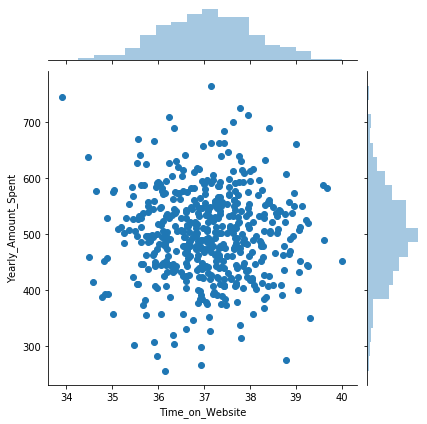

In [54]:

# time on Website and Yearly Amount Spent columns.  Is there a correlation?'''

sns.jointplot(Fyntra.Time_on_Website, Fyntra.Yearly_Amount_Spent)

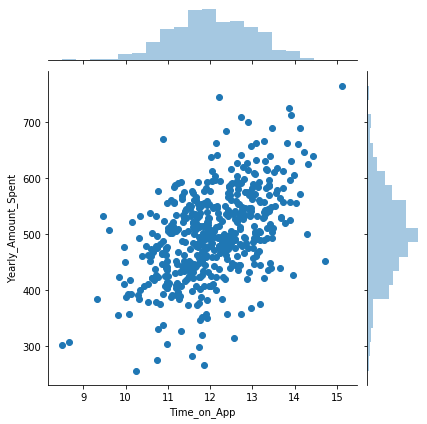

In [55]:
sns.jointplot(Fyntra.Time_on_App, Fyntra.Yearly_Amount_Spent)

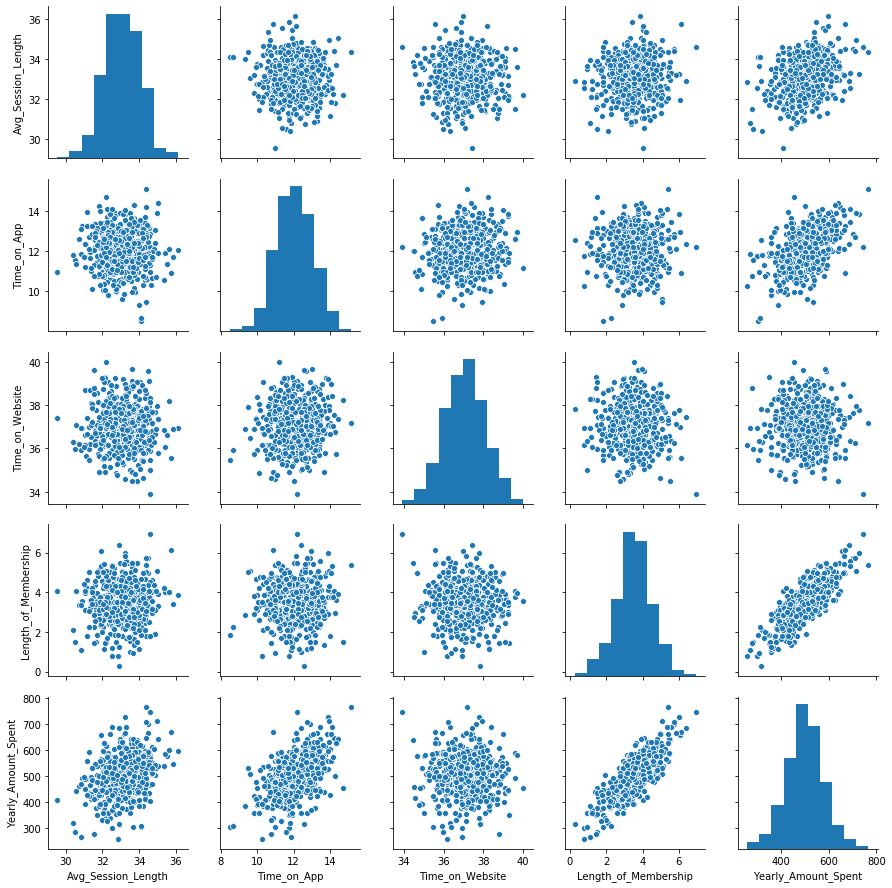

In [56]:
sns.pairplot(Fyntra)


In [57]:
# So, length of membership has the most effect on purchase and also a fair effect of time on App.


In [60]:
# Linear Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
x = Fyntra[['Length_of_Membership']]
y = Fyntra.Yearly_Amount_Spent
x_train, x_test,y_train, y_test = train_test_split(x,y, random_state = 83, test_size = 0.30)
# Random state is used to fix the randomness of test and trsin data selection, otherwise every time the model eill select diffrernt rndom data


# x_train = pd.DataFrame(x_train)
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
y_predict = lr.predict(x_test)

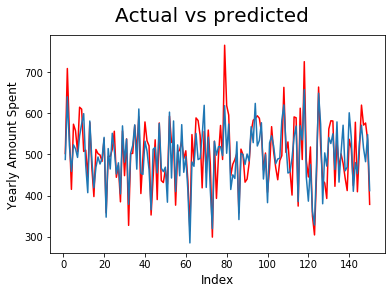

In [78]:
import matplotlib.pyplot as plt
c = [i for i in range(1,151,1)]
fig = plt.figure()
plt.plot(c, y_test, color = "red", linewidth =1.5, linestyle = '-')
plt.plot(c, y_predict, linestyle = '-')
fig.suptitle('Actual vs predicted', fontsize = 20)
plt.xlabel('Index', fontsize = 12)
plt.ylabel('Yearly Amount Spent', fontsize = 12)
# plt.legend()
plt.show()

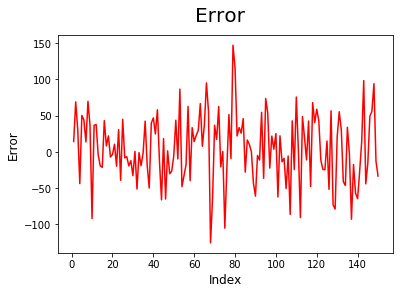

In [79]:
c = [i for i in range(1,151,1)]
fig = plt.figure()
plt.plot(c, y_test-y_predict, color = "red", linewidth =1.5, linestyle = '-')
# plt.plot(c, y_predict, linestyle = '-')
fig.suptitle('Error', fontsize = 20)
plt.xlabel('Index', fontsize = 12)
plt.ylabel('Error', fontsize = 12)
# plt.legend()
plt.show()

Text(0, 0.5, 'Actual')

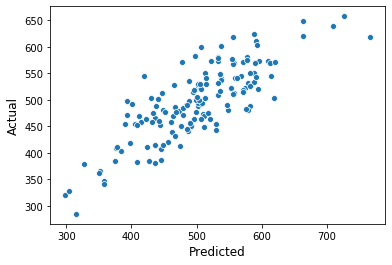

In [81]:
sns.scatterplot(y_test, y_predict)
plt.xlabel('Predicted', fontsize = 12)
plt.ylabel('Actual', fontsize = 12)

In [89]:
import numpy as np
R_sq = r2_score(y_test, y_predict)
RMSE = np.sqrt(mean_squared_error(y_test, y_predict))
print('The Coefficient of detreminataion is computed as :',round(R_sq,2),'\n','And the RMSE is :', RMSE)

The Coefficient of detreminataion is computed as : 0.66 
 And the RMSE is : 46.823353493026865
